In [12]:
import pandas as pd

In [13]:
import torch as pt

In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import nltk
plt.style.use('ggplot')

In [17]:
df=pd.read_csv("Reviews.csv")

In [18]:
df=df.head(500)

In [44]:
df.shape

(500, 10)

In [98]:
import string
def clean_text(text):
  text = text.lower()
  text = ''.join([c for c in text if c not in string.punctuation])
  return text

df['Text'] = df['Text'].apply(clean_text)

In [99]:
df['Label'] = df['Score'].apply(lambda x: 'Negative' if 0 <= x <= 2 else ('Neutral' if x == 3 else 'Positive'))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,Positive


<Axes: title={'center': 'Count of Reviews by Stars'}, xlabel='Review'>

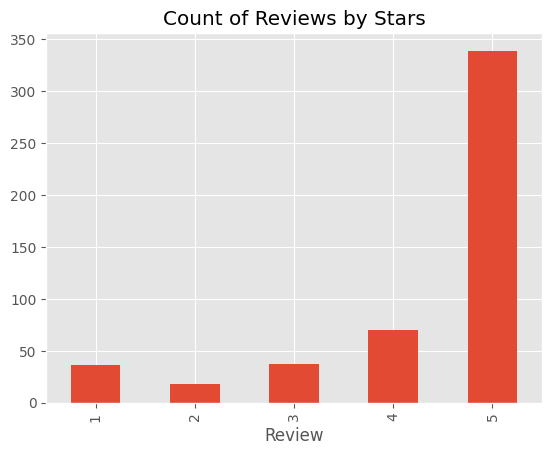

In [100]:
df['Score'].value_counts().sort_index().plot(kind='bar', xlabel="Review", title="Count of Reviews by Stars")

In [101]:
example=df['Text'][50]
example

'this oatmeal is not good its mushy soft i dont like it quaker oats is the way to go'

In [102]:
nltk.download('punkt')
tokens=nltk.word_tokenize(example)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['this',
 'oatmeal',
 'is',
 'not',
 'good',
 'its',
 'mushy',
 'soft',
 'i',
 'dont',
 'like',
 'it',
 'quaker',
 'oats',
 'is',
 'the',
 'way',
 'to',
 'go']

In [103]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(tokens)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('this', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('its', 'PRP$'),
 ('mushy', 'JJ'),
 ('soft', 'JJ'),
 ('i', 'NN'),
 ('dont', 'VBP'),
 ('like', 'IN'),
 ('it', 'PRP'),
 ('quaker', 'JJR'),
 ('oats', 'NNS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB')]

In [104]:
nltk.download('words')
nltk.download('maxent_ne_chunker')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  this/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  its/PRP$
  mushy/JJ
  soft/JJ
  i/NN
  dont/VBP
  like/IN
  it/PRP
  quaker/JJR
  oats/NNS
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [105]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [106]:

nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [107]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [108]:
res={}
for i , row in tqdm(df.iterrows(), total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [109]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [110]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,Positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,Negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,Positive
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,Negative
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,Positive


In [144]:
x=sum(vaders['pos'])

y=sum(vaders['neg'])

z=sum(vaders['neu'])

c=sum(vaders['compound'])/len(vaders['compound'])
print("Positive Score: ", x, ", Negative Score: ", y, ", Neutral Score: ", z, ", Average Compound Score: ",c)

Positive Score:  96.14300000000001 , Negative Score:  21.643999999999995 , Neutral Score:  382.20399999999984 , Average Compound Score:  0.6302509999999998


In [145]:

if c > 0.5:
  print("The overall sentiment of this analysis is POSITIVE")
elif c < -0.05:
  print("The overall sentiment of this analysis is NEGATIVE")
else:
  print("The overall sentiment of this analysis is NEUTRAL")

The overall sentiment of this analysis is POSITIVE


Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

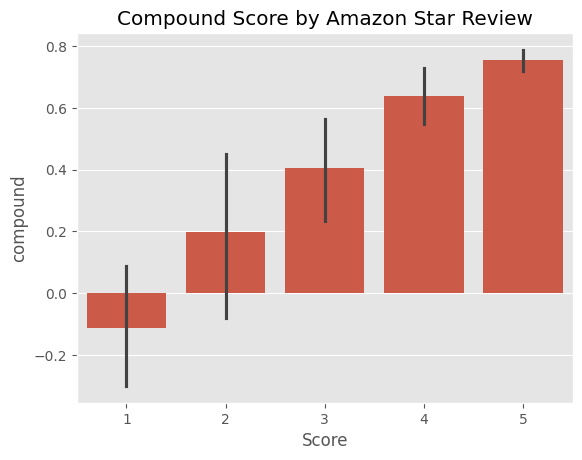

In [146]:

ax=sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')

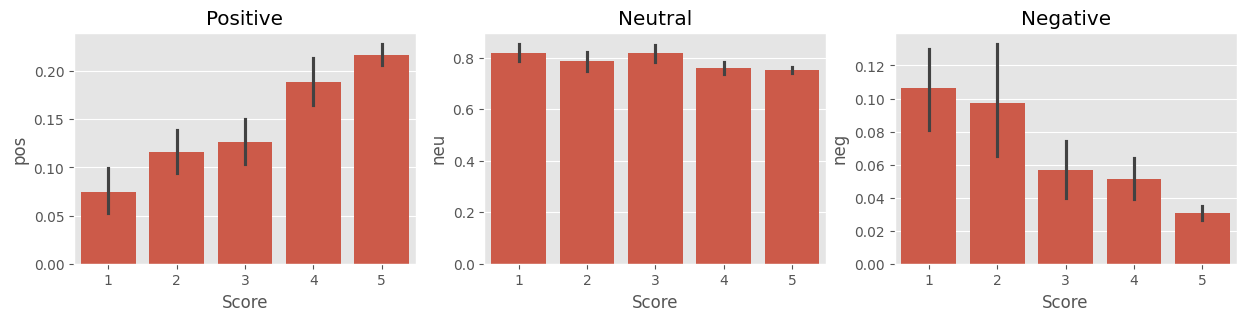

In [147]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[2].set_title('Negative')
axs[1].set_title('Neutral')
plt.show()

In [148]:
vaders['prediction'] = vaders['compound'].apply(lambda x: 'Negative' if -1 <= x <= 0.05 else ('Neutral' if -0.05 < x < 0.05 else 'Positive'))
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,prediction
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,Positive,Positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,Negative,Negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,Positive,Positive
3,4,0.000,0.925,0.075,0.4404,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,Negative,Positive
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,Positive,Positive


In [149]:
from sklearn.metrics import accuracy_score
print("The accuracy of the vader model is ", (accuracy_score(vaders['Label'], vaders['prediction'])*100))

The accuracy of the vader model is  82.8


In [150]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [151]:
model_name=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(model_name)
model=AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [152]:
def polarity_scores_roberta(example):
  e=tokenizer(example, return_tensors='pt')
  o = model(**e)
  scores=o[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict ={
    'roberta_negative':scores[0],
    'roberta_neutral':scores[1],
    'roberta_positive':scores[2],}
  return scores_dict


In [153]:
res={}
for i , row in tqdm(df.iterrows(), total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result_rename, **roberta_result}
    res[myid]=both

  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [154]:
rs=pd.DataFrame(res).T
rs=rs.reset_index().rename(columns={'index':'Id'})
rs=rs.merge(df,how='left')

In [155]:
rs.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,0.000,0.695,0.305,0.9441,0.007755,0.036793,0.955452,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,Positive
1,2,0.138,0.862,0.000,-0.5664,0.405942,0.559726,0.034332,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,Negative
2,3,0.091,0.754,0.155,0.8265,0.002631,0.081570,0.915800,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,Positive
3,4,0.000,0.925,0.075,0.4404,0.002004,0.070630,0.927366,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,Negative
4,5,0.000,0.552,0.448,0.9468,0.001743,0.010169,0.988088,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,Positive


In [156]:
x=sum(rs['roberta_positive'])

y=sum(rs['roberta_negative'])

z=sum(rs['roberta_neutral'])


print("Positive Score: ", x, ", Negative Score: ", y, ", Neutral Score: ", z)

Positive Score:  371.0906122151064 , Negative Score:  63.344312959583476 , Neutral Score:  65.5650732559152


In [157]:
if x > (y and z):
  print("The overall sentiment of this analysis is POSITIVE")
elif y > (x and z):
  print("The overall sentiment of this analysis is NEGATIVE")
else:
  print("The overall sentiment of this analysis is NEUTRAL")

The overall sentiment of this analysis is POSITIVE


In [158]:
def determine_prediction(row):
    max_score = row.max()
    if row['roberta_positive'] == max_score:
        return 'Positive'
    elif row['roberta_negative'] == max_score:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column 'roberta_prediction' based on the highest score
rs['roberta_prediction'] = rs[['roberta_positive', 'roberta_negative', 'roberta_neutral']].apply(determine_prediction, axis=1)
rs.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,roberta_prediction
0,1,0.000,0.695,0.305,0.9441,0.007755,0.036793,0.955452,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,Positive,Positive
1,2,0.138,0.862,0.000,-0.5664,0.405942,0.559726,0.034332,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,Negative,Neutral
2,3,0.091,0.754,0.155,0.8265,0.002631,0.081570,0.915800,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,Positive,Positive
3,4,0.000,0.925,0.075,0.4404,0.002004,0.070630,0.927366,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,Negative,Positive
4,5,0.000,0.552,0.448,0.9468,0.001743,0.010169,0.988088,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,Positive,Positive


In [159]:
from sklearn.metrics import accuracy_score
print("The accuracy of the roberta model is ", (accuracy_score(rs['Label'], rs['roberta_prediction'])*100))

The accuracy of the roberta model is  85.39999999999999


In [160]:
rs.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_negative', 'roberta_neutral', 'roberta_positive', 'ProductId',
       'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Label',
       'roberta_prediction'],
      dtype='object')

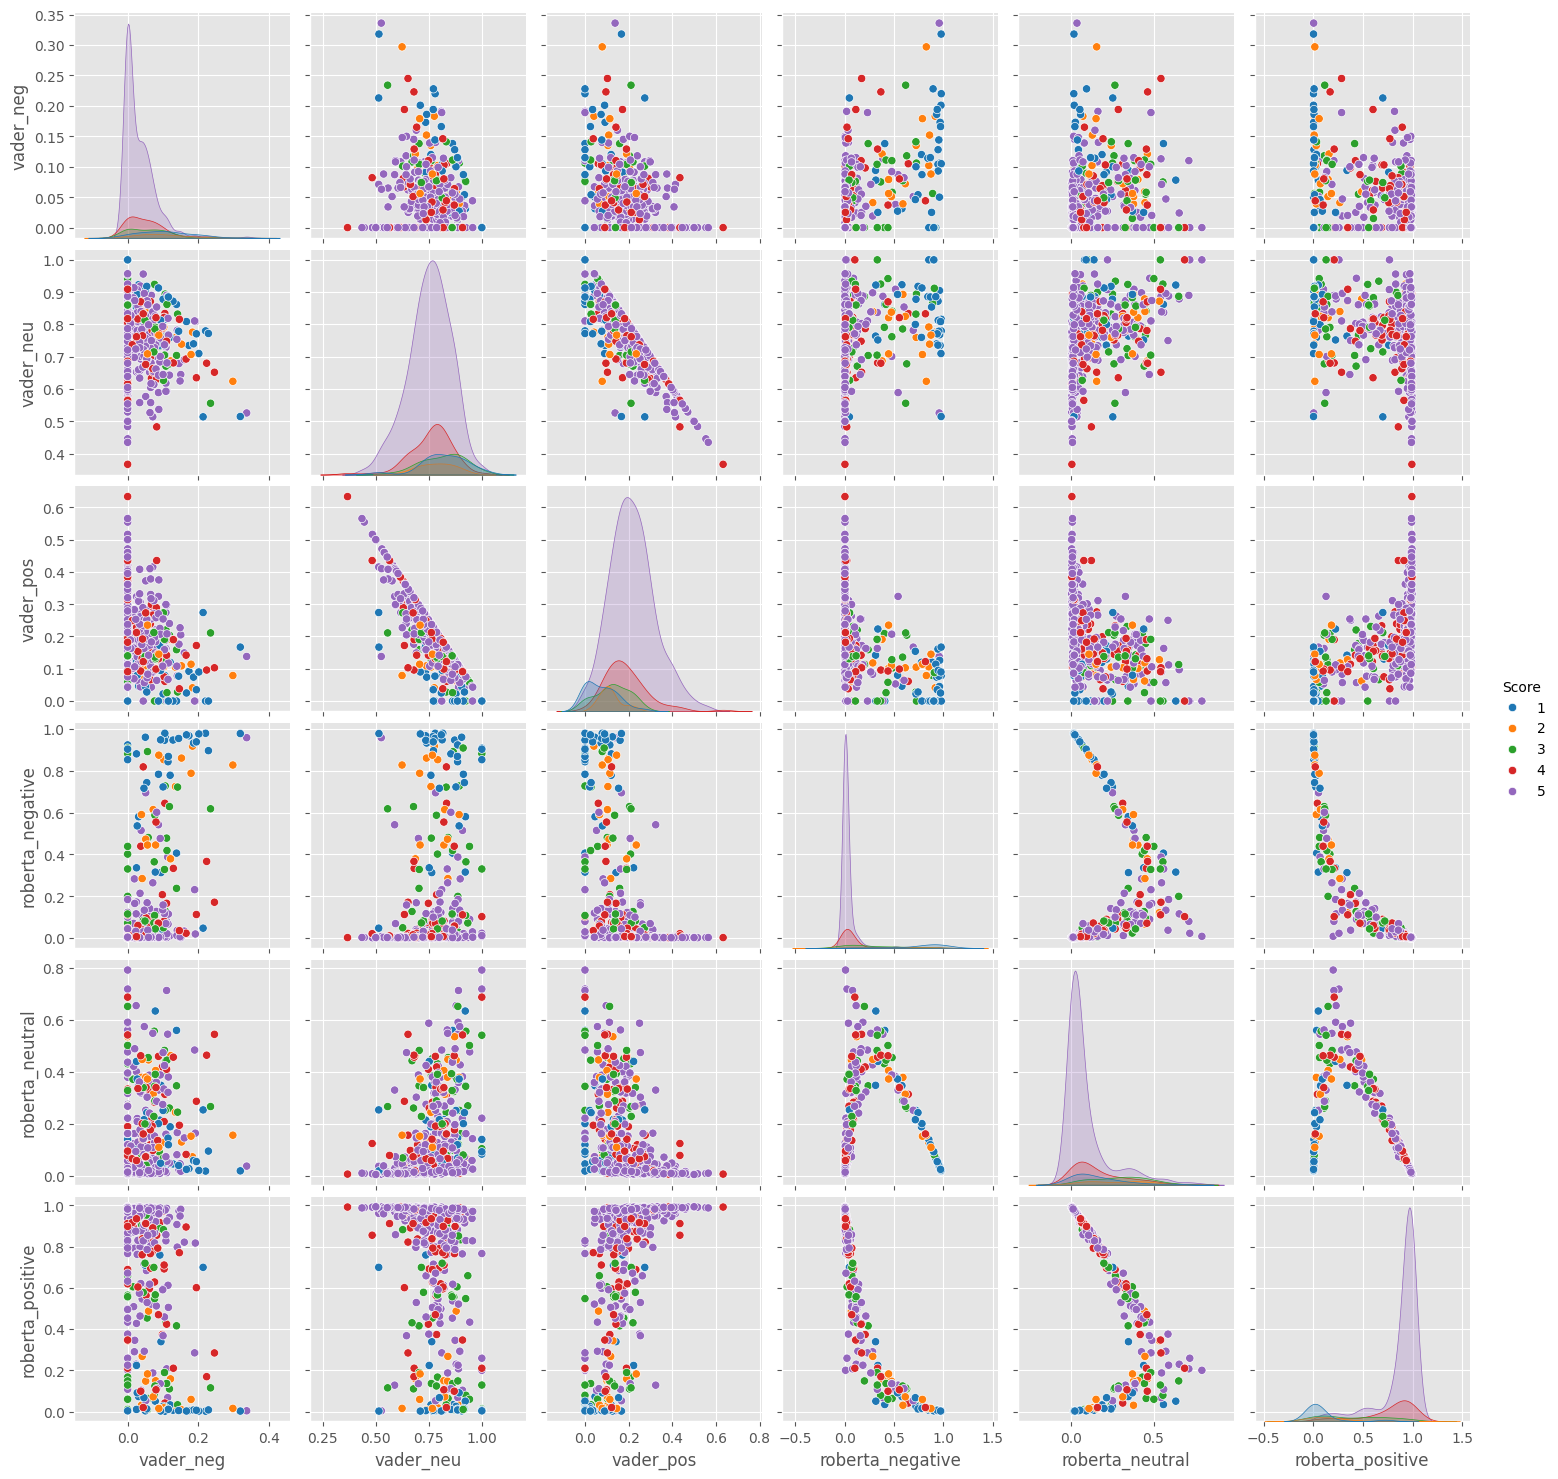

In [161]:

sns.pairplot(data=rs, vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_negative', 'roberta_neutral', 'roberta_positive',], hue='Score',palette='tab10')
plt.show()

In [162]:
rs.query('Score==1').sort_values('roberta_positive',ascending=False)['Text'].values[0]

'i felt energized within five minutes but it lasted for about 45 minutes i paid 399 for this drink i could have just drunk a cup of coffee and saved my money'

In [163]:
rs.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'so we cancelled the order  it was cancelled without any problem  that is a positive note'

In [164]:
rs.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds my fault'

In [165]:
rs.query('Score==5').sort_values('roberta_negative',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds my fault'

In [166]:
from transformers import pipeline


In [167]:
sentiment_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [168]:
sentiment_pipeline('I love food')

[{'label': 'POSITIVE', 'score': 0.9998365640640259}]

In [169]:
sentiment_pipeline('I wanna cry')

[{'label': 'NEGATIVE', 'score': 0.9646044969558716}]